In [1]:
import tensorflow as tf
tf.test.is_gpu_available()

D:\anaconda\envs\nlu_project_2_env\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\envs\nlu_project_2_env\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\envs\nlu_project_2_env\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\envs\nlu_project_2_env\lib\site-packages\tensorflow\python\frame

True

In [2]:
from keras.layers import Activation

Using TensorFlow backend.


In [3]:
from keras.layers import Input,Conv2D,Lambda,merge,Dense,Flatten,MaxPooling2D,Add,Lambda

In [4]:
from keras.regularizers import l2

In [5]:
import keras

In [6]:
from keras import backend as K
from keras.optimizers import SGD,Adam

In [7]:
from keras.losses import binary_crossentropy

In [26]:
from numpy import random as rdm

In [27]:
import numpy as np

In [5]:
import os

In [6]:
import dill as pickle

In [7]:
from matplotlib import pyplot as plt

In [8]:
import matplotlib

In [9]:
from numpy.random import shuffle

In [10]:
image_dir =r'C:\Users\24839\Desktop\jupyter-code\omniglot\python'

In [11]:
import os
root_dir =os.listdir(image_dir)  #image_bg是训练集,30个字母表
# image_evaluation 是test集，20个字母表
root_dir

['images_background',
 'images_background_small1',
 'images_background_small2',
 'images_evaluation',
 'one-shot-classification']

In [12]:
from keras.preprocessing.image import load_img,img_to_array

In [13]:
one_img =load_img(r'C:\Users\24839\Desktop\jupyter-code\omniglot\python\images_background\Alphabet_of_the_Magi\character02\0710_01.png')

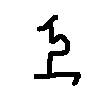

In [14]:
one_img

In [20]:
img_to_array(one_img).shape

(105, 105, 3)

In [21]:
type(img_to_array(one_img))

numpy.ndarray

In [15]:
s_dir =os.path.join(image_dir,'images_background')
image_list =[]
for dir_ in os.listdir(s_dir):
    su_dir =os.path.join(s_dir,dir_)
    for dir_ in os.listdir(su_dir):
        sub_dir =os.path.join(su_dir,dir_)
        sub_image_list =[]
        for image_name in os.listdir(sub_dir):
            image_path = os.path.join(sub_dir,image_name)
            img_array= img_to_array(load_img(image_path)) 
            sub_image_list.append(img_array)
        image_list.append(sub_image_list)

In [22]:
train_result =np.array(image_list)

In [24]:
train_result.shape

(964, 20, 105, 105, 3)

In [16]:
s_dir =os.path.join(image_dir,'images_evaluation')
image_list =[]
for dir_ in os.listdir(s_dir):
    su_dir =os.path.join(s_dir,dir_)
    for dir_ in os.listdir(su_dir):
        sub_dir =os.path.join(su_dir,dir_)
        sub_image_list =[]
        for image_name in os.listdir(sub_dir):
            image_path = os.path.join(sub_dir,image_name)
            img_array= img_to_array(load_img(image_path)) 
            sub_image_list.append(img_array)
        image_list.append(sub_image_list)

In [21]:
val_result =np.array(image_list)

In [27]:
val_result.shape

(659, 20, 105, 105, 3)

# 以下是建立siamese模型并训练的代码模块

In [28]:
def W_init(shape,name =None):
    values =rdm.normal(loc =0,scale =1e-2,size =shape)
    return K.variable(values,name =name)

In [29]:
def b_init(shape,name =None):
    values =rdm.normal(loc =0.5,scale =1e-2,size =shape)
    return K.variable(values,name =name)

In [30]:
input_shape =(105,105,3)
left_input =Input(input_shape)
right_input =Input(input_shape)

In [31]:
from keras.models import Model,Sequential
siamese_convnet =Sequential()

In [32]:
siamese_convnet.add(Lambda(lambda x:(K.mean(x,axis =3,keepdims =True)/255),input_shape =input_shape))

In [33]:
siamese_convnet.add(Conv2D(64,(10,10),activation ='relu',kernel_initializer =keras.initializers.RandomNormal(mean=0.0, stddev=1e-2, seed=None),bias_initializer =keras.initializers.RandomNormal(mean=0.5, stddev=1e-2, seed=None),kernel_regularizer=l2(2e-4)))

Instructions for updating:
Colocations handled automatically by placer.


In [34]:
siamese_convnet.add(MaxPooling2D())

In [35]:
siamese_convnet.add(Conv2D(128,(7,7),activation ='relu',kernel_regularizer =l2(2e-4),kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=1e-2, seed=None),bias_initializer =keras.initializers.RandomNormal(mean=0.5, stddev=1e-2, seed=None)))

In [36]:
siamese_convnet.add(MaxPooling2D())

In [37]:
siamese_convnet.add(Conv2D(256,(4,4),activation ='relu',kernel_initializer =keras.initializers.RandomNormal(mean=0.0, stddev=1e-2, seed=None),bias_initializer =keras.initializers.RandomNormal(mean=0.5, stddev=1e-2, seed=None),kernel_regularizer =l2(1e-3)))

In [38]:
siamese_convnet.add(Flatten())

In [39]:
siamese_convnet.add(Dense(1024,activation ='sigmoid',kernel_initializer =keras.initializers.RandomNormal(mean=0.0, stddev=1e-2, seed=None),bias_initializer =keras.initializers.RandomNormal(mean=0.5, stddev=1e-2, seed=None),kernel_regularizer =l2(1e-3)))

In [40]:
encoded_l =siamese_convnet(left_input)
encoded_r =siamese_convnet(right_input)

In [41]:
#L1_distance =lambda x:K.abs(x[0]-x[1])
Abs =Lambda(lambda x:K.abs(x[0]-x[1]))

In [42]:
# both =merge([encoded_l,encoded_r],mode =L1_distance,output_shape =lambda x:x[0])
both  =Abs([encoded_l,encoded_r])
#或者 both =Add()([encode_1,Lambda(lambda x: -x)(encode_r)])

In [43]:
prediction =Dense(1,activation='sigmoid',bias_initializer =keras.initializers.RandomNormal(mean=0.5, stddev=1e-2))(both)

In [44]:
siamese_convnet_all =Model(input=[left_input,right_input],output=prediction)

D:\anaconda\envs\nlu_project_2_env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [45]:
siamese_convnet_all.compile(loss= 'binary_crossentropy',optimizer =Adam(0.00006))

In [46]:
siamese_convnet_all.count_params()

85869249

In [23]:
class Data_Loader:
    def __init__(self,Xtrain,Xval):
        self.Xtrain =Xtrain
        self.Xval =Xval
        self.n_classes,self.n_examples,self.w,self.h,self.channel =Xtrain.shape
        self.n_classes_val,self.n_examples_val,_,_,_ =Xval.shape
    def get_batch(self,n):
        categories =rdm.choice(self.n_classes,size=(n,),replace =False)
        pairs =[np.zeros((n,self.w,self.h,3)) for i in range(2)]
        targets =np.zeros((n,))
        targets[n//2:] =1
        for i in range(n):
            category_1 =categories[i]
            idx_1 =rdm.randint(0,self.n_examples)
            pairs[0][i,:,:,:] =self.Xtrain[category_1,idx_1].reshape(self.w,self.h,3)
            idx_2 =rdm.randint(0,self.n_examples)
            category_2 =category_1 if i>=n//2 else (category_1 + rdm.randint(1,self.n_classes))%self.n_classes
            pairs[1][i,:,:,:] =self.Xtrain[category_2,idx_2].reshape(self.w,self.h,3)
        return pairs,targets
    def make_one_shot_task_visiable(self,M,model):
        categories =rdm.choice(self.n_classes_val,size=(M,),replace =False) # 选择M的类
        indices =rdm.randint(0,self.n_examples_val,size=(M,)) # 选择M的example的index
        mps =rdm.randint(0,len(categories)) # 挑选一个类做query，找到这个类在M集合的下标
        true_category =categories[mps] # 找到这个类的class下标
        ex1,ex2 =rdm .choice(self.n_examples,replace =False,size =(2,))  # 区分query和support中对应类图片的下标
        test_image =np.asarray([self.Xval[true_category,ex1,:,:]]*M).reshape(M,self.w,self.h,3) #复制query为M份
        support_set =self.Xval[categories,indices,:,:,:] #形成support集合
        support_set[mps,:,:,:] =self.Xval[true_category,ex2] # 修改support集合中与query同类的图片
        support_set =support_set.reshape(M,self.w,self.h,3) #reshape
        print('显示support_set的图片：')
        for idx,image_matrix in enumerate(support_set) :
            image =Image.fromarray(image_matrix.astype(np.uint8))
            # image.show()
            #image.thumbnail((image.size[0]//2, image.size[1]//2)) # 缩放到50%
            image = image.resize((image.size[0]//2, image.size[1]//2))
            subplt =plt.subplot(len(support_set),1,idx+1)
            subplt.imshow(image)
            plt.show()
        probs =model.predict([support_set,test_image])
        nearest_image_index =np.argmax(probs)
        print('显示query图片:')
        image =Image.fromarray(test_image[0].astype(np.uint8))
        # image.show()
        # image.thumbnail((image.size[0]//2, image.size[1]//2)) # 缩放到50%
        image =image.resize((image.size[0]//2, image.size[1]//2))
        plt.imshow(image)
        plt.show()
        print('在support-set中预测最相似图片下标为{},显示support-set中的对应图片:'.format(nearest_image_index))
        image =Image.fromarray(support_set[nearest_image_index].astype(np.uint8))
        # image.show() 
        #image.thumbnail((image.size[0]//2, image.size[1]//2)) # 缩放到50%
        image =image.resize((image.size[0]//2, image.size[1]//2))
        plt.imshow(image)
        plt.show()
    def make_one_shot_task(self,N):
        categories =rdm.choice(self.n_classes_val,size =(N,),replace =False)
        indices =rdm .randint(0,self.n_examples_val,size =(N,))
        true_category =categories[1]
        ex1,ex2 =rdm .choice(self.n_examples,replace =False,size =(2,))
        test_image =np.asarray([self.Xval[true_category,ex1,:,:]]*N).reshape(N,self.w,self.h,3)
        support_set =self.Xval[categories,indices,:,:,:]
        support_set[1,:,:,:] =self.Xval[true_category,ex2]
        support_set =support_set.reshape(N,self.w,self.h,3)
        pairs = [test_image,support_set]
        targets =np.zeros((N,))
        targets[1] =1
        return pairs ,targets
    def test_one_shot(self,model,N,k,verbose=True):
        n_correct =0
        if verbose:
            print('测试',N,'ways one shot 任务,任务有',k,'个')
        for i in range(k):
            input_, targets =self.make_one_shot_task(N)
            probs =model.predict(input_)
            if np.argmax(probs) == 1:
                n_correct +=1
        percent_correct =(100.0*n_correct/k)
        if verbose:
            print('总共测试了',k,'个support&query任务,命中率:',percent_correct,'%')
        return percent_correct

In [24]:
loader =Data_Loader(train_result,val_result)

In [49]:
per_iter_evaluate =1000
per_iter_show_loss =300
batch_size =32
N_way =20
n_val =500
# siamese_net_all.load_weights('路径')
best =70.0

In [50]:
for i in range(500000):
    (inputs,targets) =loader.get_batch(batch_size)
    loss =siamese_convnet_all.train_on_batch(inputs,targets)
    if i% per_iter_show_loss ==0:
        print("iteration {}, training loss: {:.2f},".format(i,loss))
    if i % per_iter_evaluate ==0:
        val_acc =loader.test_one_shot(siamese_convnet_all,N_way,n_val,verbose =True)
        if val_acc >=best+10:
            print('处于iteration {},进行一次evaluation'.format(i),'目前表现val_acc:',val_acc,'% 大于best:',best,'% 保存一下模型..')
            siamese_convnet_all.save('keras-siamese-network_accuracy{}%'.format(int(val_acc)))
            best =val_acc
        else:
            print('处于iteration {},进行一次evaluation'.format(i),'目前表现val_acc:',val_acc,'% 对比上次记录的best:',best,'%')
        if val_acc>99:
            print('模型准确率大于99%,保存模型并提前结束')
            siamese_convnet_all.save('keras-siamese-network_accuracy{}%'.format(int(val_acc)))
            break

Instructions for updating:
Use tf.cast instead.
iteration 0, training loss: 9.28,
测试 20 ways one shot 任务,任务有 500 个
总共测试了 500 个support&query任务,命中率: 24.0 %
处于iteration 0,进行一次evaluation 目前表现val_acc: 24.0 % 对比上次记录的best: 70.0 %
iteration 300, training loss: 2.35,
iteration 600, training loss: 1.21,
iteration 900, training loss: 0.91,
测试 20 ways one shot 任务,任务有 500 个
总共测试了 500 个support&query任务,命中率: 33.6 %
处于iteration 1000,进行一次evaluation 目前表现val_acc: 33.6 % 对比上次记录的best: 70.0 %
iteration 1200, training loss: 0.74,
iteration 1500, training loss: 0.68,
iteration 1800, training loss: 0.54,
测试 20 ways one shot 任务,任务有 500 个
总共测试了 500 个support&query任务,命中率: 40.0 %
处于iteration 2000,进行一次evaluation 目前表现val_acc: 40.0 % 对比上次记录的best: 70.0 %
iteration 2100, training loss: 0.55,
iteration 2400, training loss: 0.56,
iteration 2700, training loss: 0.44,
iteration 3000, training loss: 0.37,
测试 20 ways one shot 任务,任务有 500 个
总共测试了 500 个support&query任务,命中率: 46.2 %
处于iteration 3000,进行一次evaluation 目前表现val_acc: 46.2 

KeyboardInterrupt: 

In [2]:
val_acc =71.0

In [58]:
siamese_convnet_all.load_weights("keras-siamese-network_accuracy{}%".format(int(val_acc)))

In [52]:
siamese_convnet_all.save('keras-siamese-network_accuracy{}%'.format(int(val_acc)))

In [50]:
from PIL import Image

显示support_set的图片：


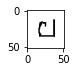

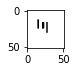

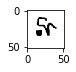

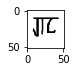

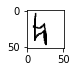

显示query图片:


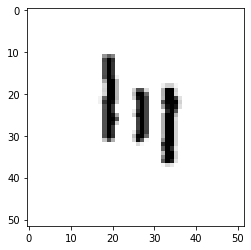

在support-set中预测最相似图片下标为1,显示support-set中的对应图片:


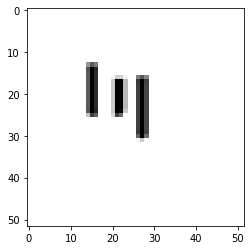

In [62]:
loader.make_one_shot_task_visiable(5,siamese_convnet_all)

In [63]:
batch_size =32
(inputs,targets) =loader.get_batch(batch_size)

In [64]:
siamese_convnet_all.predict(inputs).argmax()

23

In [1]:
from keras.models import load_model

D:\anaconda\envs\nlu_project_2_env\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
D:\anaconda\envs\nlu_project_2_env\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\envs\nlu_project_2_env\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\envs\nlu_project_2_env\lib\si

In [3]:
loaded_model =load_model('keras-siamese-network_accuracy{}%'.format(int(val_acc))) #后缀一般是.h5，我这里没有后缀

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [17]:
from PIL import Image

显示support_set的图片：


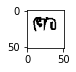

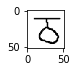

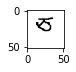

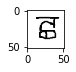

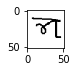

显示query图片:


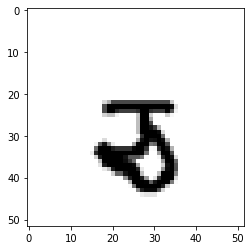

在support-set中预测最相似图片下标为2,显示support-set中的对应图片:


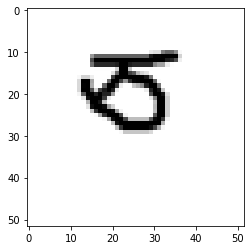

In [32]:
loader.make_one_shot_task_visiable(5,loaded_model)